# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


### Esercizio 6.01:
Questa esercitazione si propone di simulare il modello di Ising 1D utilizzando l'algoritmo di Metropolis e quello di Gibbs.
In particolare l'esercitazione consiste nel calcolare l'energia interna per spin (U), il calore specifico (C), la
suscettività magnetica ($\chi$) e la magnetizzazione (M) in funzione della temperatura T (0.5 <= T<= 2) in unità naturali.
U, C ed H vangono calcolati a campo magnetico nullo (h=0) ed M per h=0.02. L'algoritmo di Metropolis consiste nello
scegliere casualmente uno spin $s_l$ del sistema per volta e valutare la differenza $\Delta E_M$ tra l'energia del sistema
attuale e quella che si avrebbe se si cambiasse il segno di $s_l$: se $\Delta E_M<0$ si cambia il segno dello spin, se $\Delta E_M>0$ si cambia il segno con 
probabilità $$P_M= e^{-\frac{\Delta E_M}{T} }$$. Poichè l'hamiltoniana H del sistema è pari a
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
(dove $\{ s_i \}_{i=1,N}$ sono gli spin, $J>0$ e $s_{N+1} = s_{1}$)
e la variazione di energia del sisema dipende solo dai primi vicini dello spin considerato ($s_l$)
(lo spin infatti interagisce solo con essi)
si ha
$$\Delta E_M= -J [s_l-(-s_l)]( s_{l-1} - s_{l+1}) -h [s_l-(-s_l)]= -2 [J (s_{l-1} - s_{l+1}) -h]     [1]$$  
L'algoritmo di Gibbs invece consiste nello scegliere casualmente uno spin $s_l$ e di valutare la differenza
di energia 
del sitema $\Delta E_G$ tra il caso in cui $s_l=1 $ e $s_l =-1$. Quindi si pone $s_l=1 $ con probabilità
$$P_G= \frac{1}{1 -e^{\frac{\Delta E_G}{T}}}$$ e $s_l=-1 $ altrimenti. Anche in tal caso per $\Delta E_G$ si usa la [1].
Per effetuare la simulazione si deve partire dalla configurazione degli spin corrispondente alla temperatura 
T=0.5. Per ottenere tale configurazione si parte da una configurazione nota, si pone T=0.5 e si fa raggiungere 
l'equilibrio al sistema. In questa simulazione la configurazione iniziale è a T=0 (tutti gli spin hanno lo stesso segno) 
e a $T= \infty$ (ogni spin ha probabilità 1/2 di essere =1 e probabilià 1/2 di essere altrimenti) e si calcola 
U: una volta che il valore di U rimane stabile significa che si è raggiunto l'equilibrio. 
Si parte da due diverse configurazioni così da essere sicuri di aver raggiunto l'equibirio e non uno  stato metastabile.
Il grafico sottostante rappresenta il valore di U in fuzione del numero di step Monte Carlo della simulazione, dove in ogni 
                step si provano a girare tutti gli spin del sistema. 
                


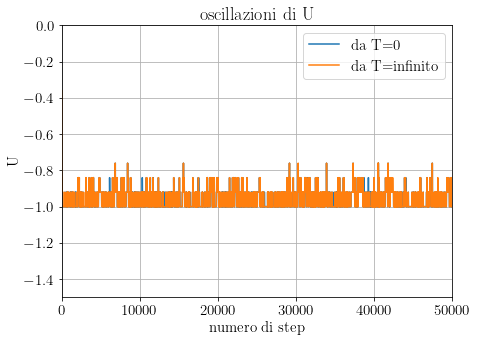

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(7,5))                         
plt.rcParams.update({'font.size': 15})          
x = np.arange(50000)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

oscill_2= np.loadtxt("C:ISING_1D/output_ene_eq_0.txt", unpack='true')
plt.plot(x,oscill_2 ,label="da T=0")

oscill_1= np.loadtxt("C:ISING_1D/output_ene_eq.txt", unpack='true')
plt.plot(x,oscill_1 ,label="da T=infinito")



plt.xlabel('numero di step')
plt.ylabel('U')
plt.title("oscillazioni di U ")
plt.axis([-1, 50000, -1.5, 0])
plt.legend()
plt.grid(True)

plt.show()

#### calcolo  dell'  energia  interna  per spin (U) 
Il grafico sottostante rappresenta il calcolo di U al variare della temperatura, ottenuto sia con l'algoritmo di Metropolis che
con quello di Gibbs. In entrambi i casi si calcola U come $U = \frac{\langle H \rangle_{h=0}}{N}$. 
Inoltre è presente il valore teorico di U pari a :
    $$
U = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$
Questo grafico, come tutti quelli a seguire, sono stati ottenuti con 15 diversi valori di T con 0.5<=T<=2 e, per ogni valore di 
T si è calcolato il valore  d'interesse e la sua inceretzza utilizzando il metodo a blocchi. 
In particolare sono stati utilizzati 100 blocchi ognuno costituito da 10000 step Monte Carlo.

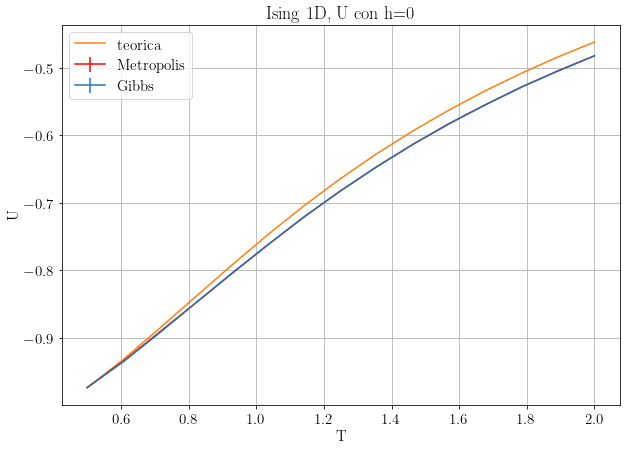

In [5]:
points=15
x = np.linspace(0.5, 2.0, num=points)

plt.figure(figsize=(10,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ene_M, errs= np.loadtxt("C:ISING_1D/output_ene.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,ene_M,yerr=errs, label="Metropolis", color="red")
ene_G, errs= np.loadtxt("C:ISING_1D/output_ene_G.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,ene_G,yerr=errs, label="Gibbs")


T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label="teorica")
plt.title('Ising 1D, U con h=0')
plt.xlabel('T')
plt.ylabel('U')
plt.legend()
plt.grid(True)

plt.show()

### calcolo della suscettività  magnetica ($ \chi $)
Il grafico sottostante rappresenta il calcolo di $\chi$ al variare della temperatura, ottenuto sia con l'algoritmo di Metropolis che
con quello di Gibbs. In entrambi i casi si calcola $\chi$ come:
     $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
        Inoltre è presente il valore teorico di $\chi$ pari a :
    $$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

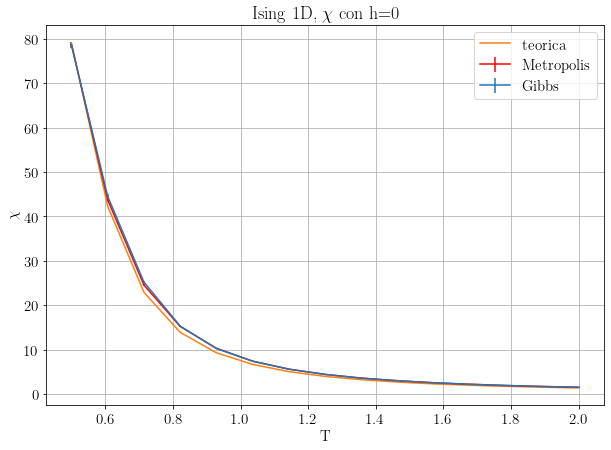

In [6]:
plt.figure(figsize=(10,7))
chi, errs= np.loadtxt("C:ISING_1D/output_Chi.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,chi,yerr=errs, label="Metropolis", color="red")
Chi_G, errs= np.loadtxt("C:ISING_1D/output_Chi_G.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,Chi_G,yerr=errs, label="Gibbs")

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label="teorica")
plt.title('Ising 1D, $\chi$ con h=0')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.grid(True)
plt.show()

### calcolo del calore specifico (C)
Il grafico sottostante rappresenta il calcolo di C al variare della temperatura, ottenuto sia con l'algoritmo di Metropolis che
con quello di Gibbs. In entrambi i casi si calcola C come:
     $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
        Inoltre è presente il valore teorico di C pari a :
    $$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

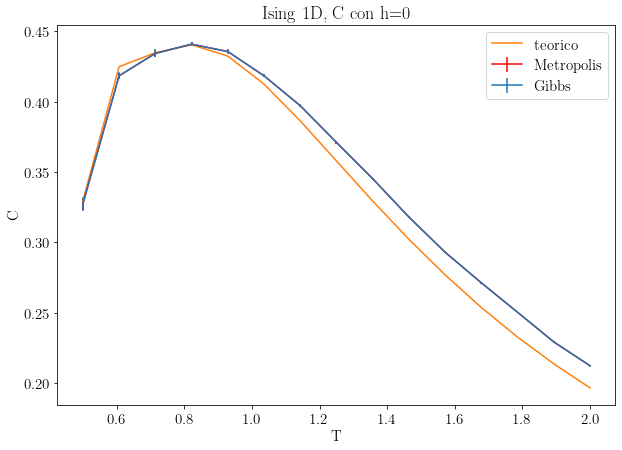

In [7]:
plt.figure(figsize=(10,7))
Heat, errs= np.loadtxt("C:ISING_1D/output_Heat.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,Heat,yerr=errs, label="Metropolis", color="red")
Heat_G, errs= np.loadtxt("C:ISING_1D/output_Heat_G.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,Heat,yerr=errs, label="Gibbs")
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label="teorico")
plt.title('Ising 1D, C con h=0')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()

### calcolo della magnetizzazione  M 
Il grafico sottostante rappresenta il calcolo di M al variare della temperatura, ottenuto sia con l'algoritmo di Metropolis che
con quello di Gibbs. In entrambi i casi si calcola M come:
     $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$
        Inoltre è presente il valore teorico di M pari a :

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

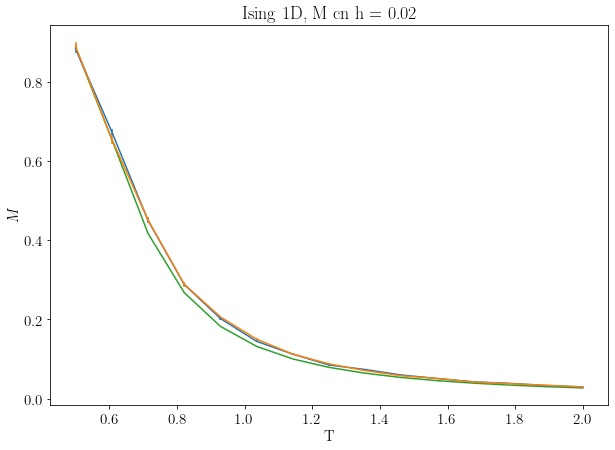

In [8]:
plt.figure(figsize=(10,7))
h=0.02 #external field
b = 1/T
magn, errs= np.loadtxt("C:ISING_1D/output_magn.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,magn,yerr=errs, label="Metropolis")
magn_G, errs= np.loadtxt("C:ISING_1D/output_magn_G.txt",usecols=(1,2), unpack='true')
plt.errorbar(x,magn_G,yerr=errs, label="Metropolis")
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, M cn h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()